<a href="https://colab.research.google.com/github/sejeong-park/Data_Box/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%88%98%EC%9A%94%EB%9F%89_%EC%98%88%EC%B8%A1%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sejeongpark","key":"3c1bc4b2359092dbc6ed84a20250d2ca"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         29           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        142           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        734           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        158           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1913           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13887           False  
house-pr

In [ ]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 36.9MB/s]


In [ ]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

train과 test의 컬럼에 차이가 보임

* train 데이터에는 casual, registered, count 변수가 존재하지만 test에는 존재하지 않음
* 우리가 예측해야할 변수는 count !
* COUNT 변수는 Casual + Registered 라고 명시되어 있었기 때문에 최종적인 결과 값을 보유한 Count가 최종 목표

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
# datetime을 날짜로 인식해주기 위해
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 데이터 EDA
## 기준별 자전거 수요량 확인해보기

In [ ]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
# dayofweek는 요일을 뜻하는 말 (월 0 ~ 일 6)
train['dayofweek'] = train['datetime'].dt.dayofweek

In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

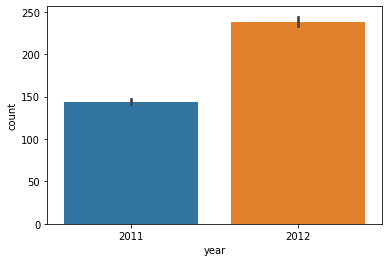

In [ ]:
sns.barplot(data=train, x = 'year', y = 'count')

* 연도별 대여량은 2011년보다 2012년이 더 많다
* 월별 대여량은 6월에 가장 많고, 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 잇을 것 같다
* 분, 초도 다 0이기 때문에 의미가 없다.

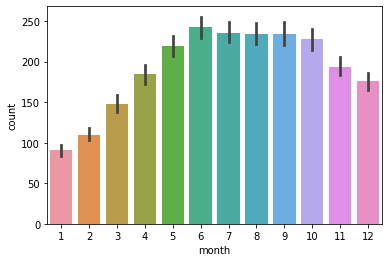

In [ ]:
sns.barplot(data = train, x = 'month', y = 'count')

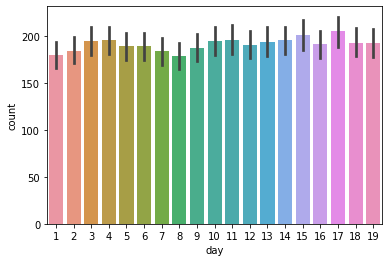

In [ ]:
sns.barplot(data = train, x = 'day', y = 'count')

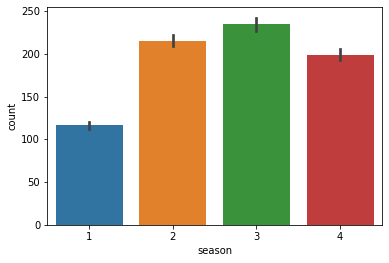

In [ ]:
sns.barplot(data = train, x = 'season', y = 'count')

In [ ]:
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


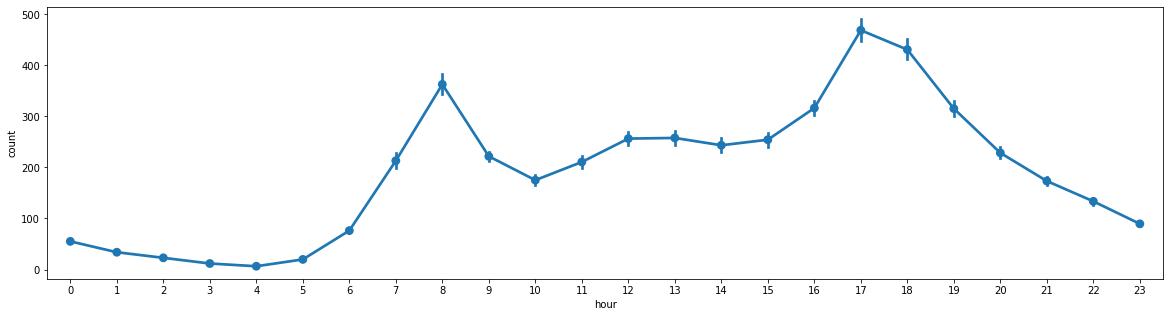

In [ ]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20, 5)
sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

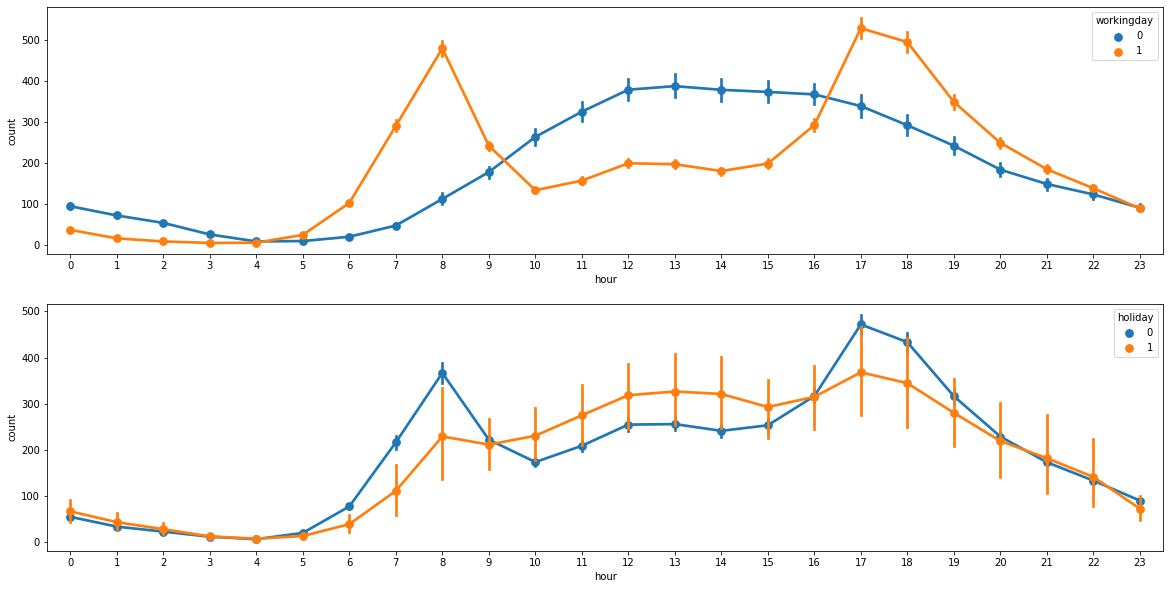

In [ ]:
# seaborn에서 카테고리형 데이터를 고려한 그래프를 출력하고 싶으면, hue 변수를 추가
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20, 10)
# holiday = 1 (근무일) holiday = 0 (근무일이 아닐 때)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax=ax2)

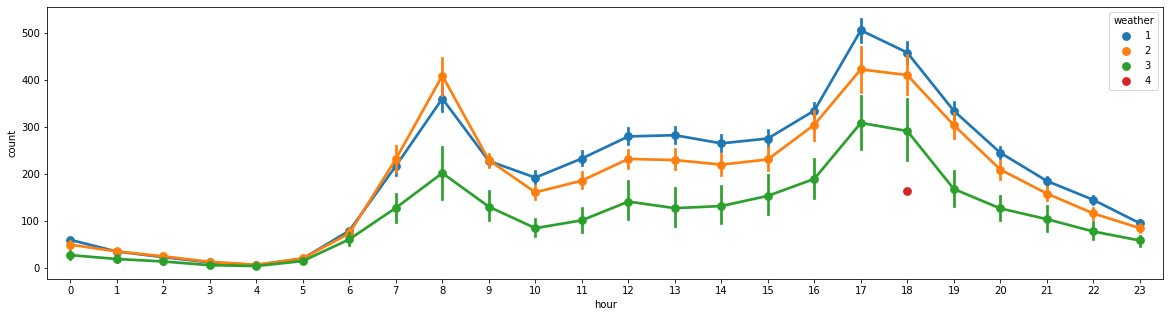

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20,5)
sns.pointplot(data = train, x = 'hour', y= 'count', hue = 'weather', ax = ax1)

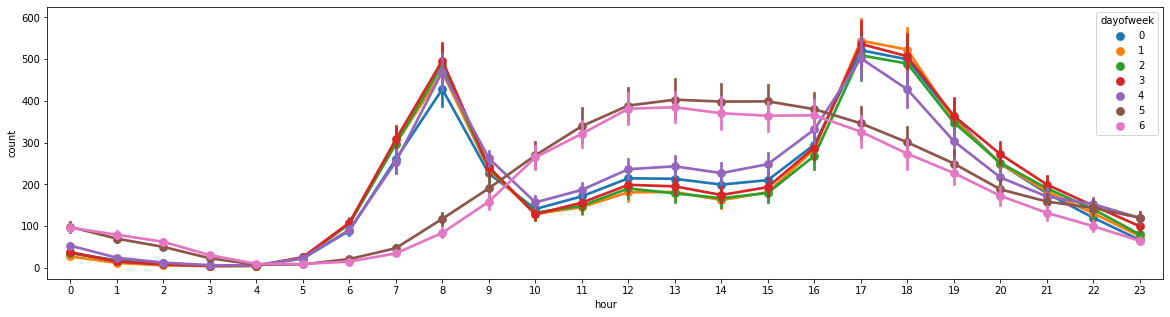

In [ ]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(20, 5)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax1)

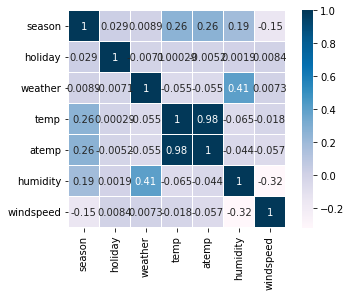

In [ ]:
# 변수끼리의 상관 관계
# 원하는 정보만 입력
corr_data = train[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(), linewidths = 0.1, square = True, annot = True, cmap = colormap)

* temp와 atemp의 상관관계가 매우 높아서, 다중공선성이 의심 -> 따라서 temp 변수 한개만 사용할 것

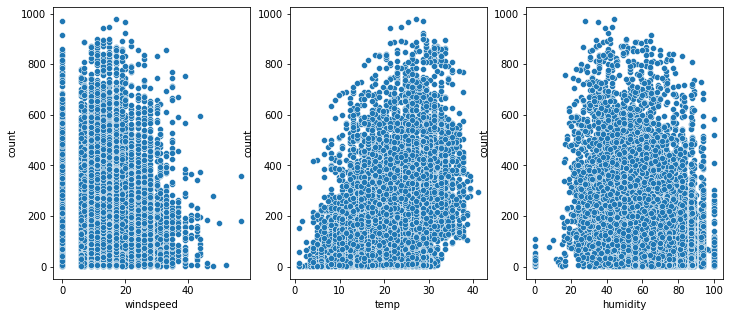

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y = 'count', ax = ax3)

바람의 세기가 0인 경우는 거의 없지 않아?
-> 이렇게 궁금해야하는 거구나...

In [ ]:
len(train[train['windspeed'] == 0])
# 결과 1313 -> feature engineering

1313

### 이상치 제거

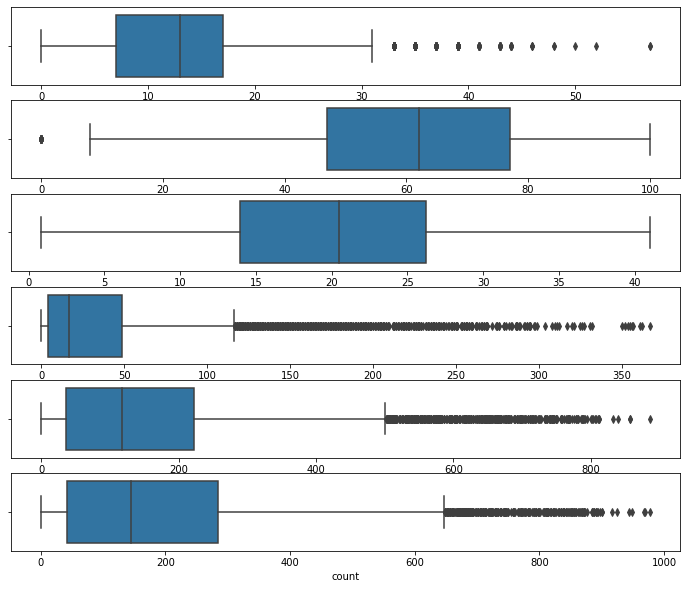

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12, 10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

In [ ]:
from collections import Counter

def detect_outliers(data, n, cols):
  outlier_indices = []
  for col in cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR

    outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col]>Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)

  return multiple_outliers

In [ ]:
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed","count"])

AttributeError: ignored

count 변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 count 변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.

In [ ]:
test = [1,2,3,4,5]
df = pd.DataFrame(test)
df



,0
0,1
1,2
2,3
3,4
4,5


In [ ]:
df.values.tolist()

[[1], [2], [3], [4], [5]]